In [97]:
# importing modules for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
#setting up data directory
data_dir = "data"

#Setting up training data directory path
train_data_dir = f"{data_dir}/train"

#setting up target data path
target_data_dir = f"{data_dir}/train.csv"

In [102]:
#load target data and display first few rows
target_data = pd.read_csv(target_data_dir)
target_data.head()


,ImageID,distance,location
0,0,351,"[215, 158]"
1,1,372,"[228, 269]"
2,2,488,"[255, 386]"
3,3,308,"[306, 426]"
4,4,67,"[248, 338]"


Target data for image ID 0:
   ImageID  distance    location
0        0       351  [215, 158]


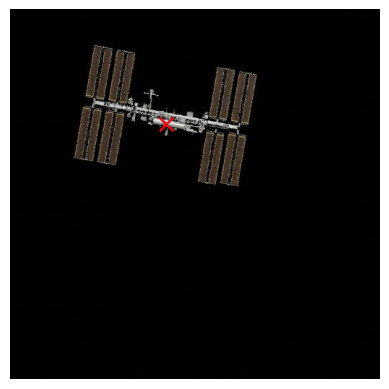

Target coordinates for image ID 0: [215, 158]


In [111]:
#load an input image and display it
from PIL import Image
import os
# Function to load and display an image
def load_and_display_image(image_path):
    if os.path.exists(image_path):
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Image not found at {image_path}")


# Display the target data for the image
image_id = 0  # Assuming the image ID corresponds to the filename
target_row = target_data[target_data['ImageID'] == image_id]
if not target_row.empty:
    print("Target data for image ID 0:")
    print(target_row)
else:
    print(f"No target data found for image ID {image_id}.")

#mark a cross on the image at the target coordinates
def mark_target_on_image(image_path, target_row):
    if os.path.exists(image_path):
        image = Image.open(image_path)
        plt.imshow(image)
        # Extract target coordinates from 'location' column
        location = target_row['location'].values[0]
        # If location is a string like '[215, 158]', convert to list
        if isinstance(location, str):
            import ast
            location = ast.literal_eval(location)
        x, y = location[0], location[1]
        # Mark the target with a red cross
        plt.scatter(x, y, color='red', s=100, marker='x')  # s is the size of the marker
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Image not found at {image_path}")

# Mark the target on the image
if not target_row.empty:
    mark_target_on_image(f"{train_data_dir}/0.jpg", target_row)
    print(f"Target coordinates for image ID 0: {target_row['location'].values[0]}")

TypeError: 'int' object is not subscriptable

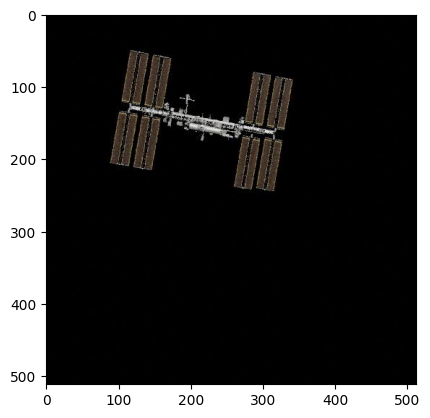

In [ ]:
# add a coloured cross on the image at the target coordinates based on the distance from the previous point. also add a colourband
def mark_colored_target_on_image(image_path, target_row):
    if os.path.exists(image_path):
        image = Image.open(image_path)
        plt.imshow(image)
        
        # Extract target coordinates from 'location' column
        location = target_row['location'].values[0]
        if isinstance(location, str):
            import ast
            location = ast.literal_eval(location)
        
        # Mark the target with a colored cross (single point)
        x, y = location[0], location[1]
        # Calculate distance from origin (0,0)
        distance = np.linalg.norm(np.array([x, y]) - np.array([0, 0]))
        color = plt.cm.viridis(distance / 100)  # Normalize distance for color mapping
        plt.scatter(x, y, color=color, s=100, marker='x')  # s is the size of the marker
        plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Normalized Distance')
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Image not found at {image_path}")
# Mark the colored target on the image
if not target_row.empty:
    mark_colored_target_on_image(f"{train_data_dir}/0.jpg", target_row)
    print(f"Target coordinates for image ID 0: {target_row['location'].values[0]}")
# Display the image with a colored cross based on distance
def display_image_with_colored_cross(image_path, target_row):
    if os.path.exists(image_path):
        image = Image.open(image_path)
        plt.imshow(image)
        
        # Extract target coordinates from 'location' column
        location = target_row['location'].values[0]
        if isinstance(location, str):
            import ast
            location = ast.literal_eval(location)
        
        # Mark the target with a colored cross (single point)
        x, y = location[0], location[1]
        distance = np.linalg.norm(np.array([x, y]) - np.array([0, 0]))
        color = plt.cm.viridis(distance / 100)  # Normalize distance for color mapping
        plt.scatter(x, y, color=color, s=100, marker='x')  # s is the size of the marker
        plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Normalized Distance')
        plt.axis('off')  # Hide axes
        plt.show()
    else:
        print(f"Image not found at {image_path}")